# Requirements

In [1]:
import os
import json
import pandas as pd
import numpy as np
import json
import logging ### to monitor the code
from bs4 import BeautifulSoup
import xml.etree.cElementTree as ET
import pickle
import math
import random
import sys
import csv
import unicodedata
import requests
from urllib.request import urlopen 
import io
import getpass
import re
from collections import defaultdict

import nltk
from nltk.collocations import *


### plotting
### to use latex
! sudo apt-get install texlive-latex-recommended 
! sudo apt install texlive-latex-extra
! sudo apt install dvipng
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from google.colab import files

import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data t1utils tex-common texlive-base texlive-binaries
  texlive-latex-base
Suggested packages:
  fonts-noto poppler-utils ghostscript fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum debhelper gv
  | postscript-viewer perl-tk xpdf-reader | pdf-viewer texlive-latex-base-doc
  texlive-latex-recommended-doc texlive-pstricks
The following NEW packages will be installed:
  fonts-d

In [2]:
!pip install sddk # our own package for working with sciencedata.dk
from  sddk import * # import all functions

!pip install anda ### our own package for working with ancient data of various kind
from anda.gr import *

In [3]:
conf = conf = configure_session_and_url("SDAM_root", "648597@au.dk")

sciencedata.dk username (format '123456@au.dk'): 648597@au.dk
sciencedata.dk password: ··········
connection with shared folder established with you as its owner
endpoint variable has been configured to: https://sciencedata.dk/files/SDAM_root/


In [0]:
### authorize google sheets
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())
# establish connection with particular sheet by its url:

sh_inaf = gc.open_by_url("https://docs.google.com/spreadsheets/d/1eExXAkrKiPp421FPsOsKhQtp9gYOs7xtVA0NkIQ-8Ko/edit?usp=sharing")

# Extract date info from cltk github

In [0]:
request_text = requests.get("https://raw.githubusercontent.com/cltk/cltk/master/cltk/corpus/greek/tlg/author_date.py").text
request_text

"AUTHOR_DATE = {'A.D. 1': ['0031', '0041', '0280', '0283', '0347', '0526', '0587', '0619', '0628', '0643', '0648', '0654', '0656', '0716', '0825', '0888', '1004', '1152', '1155', '1201', '1247', '1271', '1301', '1701', '1703', '1828', '1890', '2424', '4335'], 'a. 1 B.C.': ['0359', '0687', '0750', '1534', '1627', '1678', '1720', '2552', '2652'], 'a. A.D. 11': ['2972', '4303'], 'a. 2 B.C.?': ['2215', '2525'], 'A.D. 9': ['0723', '0738', '3043', '3128', '3177', '4040', '4093', '4097', '4101', '4149'], 'A.D. 11': ['2702', '3027', '3064', '4098', '4235', '4330'], 'A.D. 1?/6': ['4150'], 'Incertum': ['0037', '0038', '0040', '0042', '0043', '0044', '0045', '0046', '0047', '0049', '0050', '0055', '0056', '0092', '0125', '0200', '0202', '0248', '0349', '0350', '0351', '0352', '0353', '0354', '0386', '0394', '0395', '0427', '0430', '0493', '0605', '0622', '0623', '0636', '0637', '0740', '0833', '0876', '0889', '1121', '1161', '1177', '1278', '1281', '1298', '1318', '1325', '1327', '1334', '1411', 

In [0]:
### execute the string
exec(request_text)

In [0]:
### use the variable from the executed string
tlg_authordate = AUTHOR_DATE

In [0]:
### write it out for future usage
write_file("SDAM_data/OGL/tlg_authordate.json", tlg_authordate, conf)

Your <class 'dict'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/OGL/tlg_authordate.json"


In [0]:
### OR YOU CAN START HERE WITH PREPROCESSED DATA:

tlg_authordate = read_file("SDAM_data/OGL/tlg_authordate.json", "dict", conf)
tlg_authordate.keys()

dict_keys(['A.D. 1', 'a. 1 B.C.', 'a. A.D. 11', 'a. 2 B.C.?', 'A.D. 9', 'A.D. 11', 'A.D. 1?/6', 'Incertum', 'A.D. 3-4', 'a. A.D. 5?', 'A.D. 1/2', 'A.D. 2/4?', 'A.D. 3?', '1 B.C.-A.D. 1?', '6 B.C.', '5/3 B.C.', '8 B.C.', '2 B.C./A.D. 3', 'Varia', 'p. 1 B.C.', '3-2 B.C.?', 'A.D. 10/15', 'a. 6 B.C.', 'A.D. 2/3', 'p. A.D. 10', '7/6 B.C.?', 'a. A.D. 4', 'a. A.D. 1/2', '3/2 B.C.', 'A.D. 6', 'a. A.D. 1', 'A.D. 8-9?', 'A.D. 3/4?', 'A.D. 1-7', 'A.D. 13-14', 'A.D. 2', 'A.D. 6-7', 'p. 3 B.C.', 'p. A.D. 2', 'A.D. 5/7', 'A.D. 5-6', '4/2 B.C.?', 'A.D. 15-16', '7/6 B.C.', 'a. A.D. 3?', 'A.D. 2-3', '2-1 B.C.?', 'p. 4 B.C.?', '2/1 B.C.', 'a. 3 B.C.', '7-6 B.C.', 'a. A.D. 15', '4-3 B.C.?', 'a. A.D. 14/15', 'A.D. 2?', '5/4 B.C.?', '3 B.C.', '2 B.C./A.D. 2', 'a. A.D. 10', 'A.D. 2?/4', '4/3 B.C.', 'A.D. 6-10', '4 B.C./A.D. 2', 'p. 7 B.C.', '4-3 B.C.', '5-4 B.C.', 'A.D. 9-10', '4/2 B.C.', 'A.D. 9/10', '4/1 B.C.', 'A.D. 8', 'a. 3 B.C.?', '4 B.C./A.D. 1', 'A.D. 13', 'A.D. 9?', 'A.D. 8/10', 'p. A.D. 6', '3 B.C

In [0]:
### testing regex
"-" + re.match(r"\d+ B.C.", "1 B.C., A.D. 1")[0].partition(" ")[0]

'-1'

In [0]:
### testing regex
string = "> 2 B.C."
[match[0].replace(" ", "") + "-" + match[1] for match in re.findall(r'(> ?)?(\d+)', string)]

['>-2']

In [0]:
### our centuries of interest are these:
centuries = [el/10 for el in range(-75, 165, 10)]
print(centuries)

[-7.5, -6.5, -5.5, -4.5, -3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5]


In [0]:
date_string = [-1.5, -0.5, 0.5, 1.5]
date_string = [-1.5, -2.5, -3.5, -4.5, -5.5, -6.5, -7.5]
date_type = "ante"
if date_type == "rangeor": ### if it is a "range" or "or"
  date_string = [-1.5, -0.5, 0.5, 1.5]
  weighted_dates = {}
  for el in date_string:
    weighted_dates[el] = np.round(1 / len(date_string), 4)
if (date_type == "post") or (date_type == "ante") 


{-1.5: 0.25, -0.5: 0.25, 0.5: 0.25, 1.5: 0.25}

In [0]:
total = 0
for el in range(len(date_string)):
  total += 2**(el+1)

In [0]:
date_string

[-1.5, -2.5, -3.5, -4.5, -5.5, -6.5, -7.5]

In [0]:
date_string = [-2.5, -3.5, -4.5, -5.5, -6.5, -7.5]
weighted_dates = {}
total = 0
for el in range(len(date_string)):
  total += 2** (el+1)
total += 2
for date, el in zip(reversed(date_string), range(len(date_string))):
  base = 2**(el+1)
  print(base, total)
  weighted_dates[date] = base / total

2 128
4 128
8 128
16 128
32 128
64 128


In [0]:
weighted_dates

{-7.5: 0.015625,
 -6.5: 0.03125,
 -5.5: 0.0625,
 -4.5: 0.125,
 -3.5: 0.25,
 -2.5: 0.5}

In [0]:
### MAIN CLEANING REGEX
dates_cleaned = {}
dates_pairs = {}
for raw_date_string in tlg_authordate.keys():  
  if "/" in raw_date_string:
    date_type = "or"
  elif "-" in raw_date_string:
    date_type = "range"
  elif "p." in raw_date_string:
    date_type = "post"
  elif "a." in raw_date_string:
    date_type = "ante"
  else:
    date_type = ""
  if "?" in raw_date_string:
    certainty = "?"
  else:
    certainty = ""
  date_string = raw_date_string.replace("?", "") ### exclude uncertainty for the moment
  date_string = date_string.replace("/", ", ")
  date_string = date_string.replace("-", ", ")
  if not (("B.C." not in date_string) or ("A.D." not in date_string)): ### in the case there is both "A.D." and "B.C."
    date_string = date_string.replace("A.D.", "")
    try:
      date_string = "-" + re.match(r".*\d+ B.C.", date_string)[0].partition(" ")[0] + date_string.partition("B.C.")[2]
    except:
      pass
    date_string = date_string.replace("a. ", "<") # ante quem
    date_string = date_string.replace("p. ", ">") # post quem
    date_string.split(",")
  else:
    date_string = date_string.replace("A.D.", "")
    if "B.C." in date_string:
      if "p. " in date_string:
        date_string = [">-" + match for match in re.findall(r"\d+", date_string)]
      elif "a. " in date_string:
        date_string = ["<-" + match for match in re.findall(r"\d+", date_string)]
      else:
        date_string = ["-" + match for match in re.findall(r"\d+", date_string)]
    try: 
      date_string = date_string.replace("a. ", "<").replace("p. ", ">") # ante quem # post quem
    except: 
      pass
  try:
    date_string = date_string.split(",")
  except:
    pass
  date_string = [date.replace(" ", "") for date in date_string]
  date_string_ranges = []
  for date in date_string:
    if "<" in date:
      try:
        actual_list = reversed([value for value in list(range(-8, int(date.replace("<", "")))) if value != 0])
        date_string_ranges.extend(actual_list)
      except: 
        date_string_ranges.append(date)
    elif ">" in date:
      try:
        date_string_ranges.extend([value for value in list(range(int(date.replace(">", "")) + 1, 16)) if value != 0])
      except: 
        date_string_ranges.append(date)
    else:
      date_string_ranges.append(date)
  date_string = date_string_ranges
  try:
    date_string = [int(date) for date in date_string]
  except: 
    pass
  if date_type == "range":
    try:
      date_string = [num for num in range(date_string[0], date_string[1] + 1) if num != 0]
    except:
      pass
  cents = []
  for num in date_string:
    try:
      if float(num) < 0:
        cents.append(float(num) + 0.5)
      else:
        cents.append(float(num) - 0.5)
    except:
      cents.append(None)
  ### add a dictionary of weighted dates
  weighted_dates = {}
  try:
    if (date_type == "range") or (date_type == "or"): ### if it is a "range" or "or"
      for el in cents:
        weighted_dates[el] = np.round(1 / len(cents), 4)
    elif (date_type == "post") or (date_type == "ante"):
      total = 0
      for el in range(len(cents)):
        total += 2** (el+1)
      total += 2
      for date, el in zip(reversed(cents), range(len(cents))):
        base = 2**(el+1)
        weighted_dates[date] = np.round(base / total, 4)
    else:
      weighted_dates[cents[0]] = 1
  except:
    weighted_dates = {}
  try:
    date_avr = np.mean(cents[:2])
  except:
    date_avr = None
  dates_cleaned.update({raw_date_string : [cents, weighted_dates, date_avr, date_type, certainty]})
  dates_pairs[raw_date_string] = weighted_dates
dates_cleaned

{'1 B.C.': [[-0.5], {-0.5: 1}, -0.5, '', ''],
 '1 B.C.-A.D. 1': [[-0.5, 0.5], {-0.5: 0.5, 0.5: 0.5}, 0.0, 'range', ''],
 '1 B.C.-A.D. 1?': [[-0.5, 0.5], {-0.5: 0.5, 0.5: 0.5}, 0.0, 'range', '?'],
 '1 B.C./A.D. 1': [[-0.5, 0.5], {-0.5: 0.5, 0.5: 0.5}, 0.0, 'or', ''],
 '1 B.C./A.D. 1?': [[-0.5, 0.5], {-0.5: 0.5, 0.5: 0.5}, 0.0, 'or', '?'],
 '1 B.C./A.D. 4?': [[-0.5, 3.5], {-0.5: 0.5, 3.5: 0.5}, 1.5, 'or', '?'],
 '1 B.C.?': [[-0.5], {-0.5: 1}, -0.5, '', '?'],
 '2 B.C.': [[-1.5], {-1.5: 1}, -1.5, '', ''],
 '2 B.C.-A.D. 4': [[-1.5, -0.5, 0.5, 1.5, 2.5, 3.5],
  {-1.5: 0.1667,
   -0.5: 0.1667,
   0.5: 0.1667,
   1.5: 0.1667,
   2.5: 0.1667,
   3.5: 0.1667},
  -1.0,
  'range',
  ''],
 '2 B.C./A.D. 2': [[-1.5, 1.5], {-1.5: 0.5, 1.5: 0.5}, 0.0, 'or', ''],
 '2 B.C./A.D. 2?': [[-1.5, 1.5], {-1.5: 0.5, 1.5: 0.5}, 0.0, 'or', '?'],
 '2 B.C./A.D. 3': [[-1.5, 2.5], {-1.5: 0.5, 2.5: 0.5}, 0.5, 'or', ''],
 '2 B.C.?': [[-1.5], {-1.5: 1}, -1.5, '', '?'],
 '2-1 B.C.': [[-1.5, -0.5], {-1.5: 0.5, -0.5: 0.5}, 

In [0]:
cents = [0.5]
np.mean(cents[:2])

0.5

In [0]:
### manual cleaning:
dates_cleaned['p. 4 B.C./a. A.D. 2'] = [[-2.5, -1.5, -0.5, 0.5], {-2.5 : 0.25, -1.5: 0.25, -0.5: 0.25, 0.5: 0.25}, "range", -1, "", 'p. 4 B.C./a. A.D. 2']
dates_cleaned['Incertum'] = [[], {}, None, "", "", "Incertum"]
dates_cleaned['Varia'] = [[], {}, None, "", "", "Varia"]

### manual cleaning:
dates_pairs['p. 4 B.C./a. A.D. 2'] = {-2.5 : 0.25, -1.5: 0.25, -0.5: 0.25, 0.5: 0.25}
dates_pairs['Incertum'] = {}
dates_pairs['Varia'] = {}

In [0]:
dates_pairs_df = pd.DataFrame(dates_pairs).T
dates_pairs_df.fillna(0, inplace=True)
dates_pairs_df
dates_pairs_df.sort_index(axis=1, inplace=True)
dates_pairs_df.reset_index(inplace=True)
dates_pairs_df.rename({"index" : "raw_date"}, axis=1, inplace=True)
dates_pairs_df.head(5)

,raw_date,-7.5,-6.5,-5.5,-4.5,-3.5,-2.5,-1.5,-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,NaN
0,A.D. 1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,a. 1 B.C.,0.0078,0.0156,0.0312,0.0625,0.1250,0.2500,0.5000,0.0000,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,a. A.D. 11,0.0000,0.0000,0.0000,0.0000,0.0001,0.0001,0.0002,0.0005,0.001,0.002,0.0039,0.0078,0.0156,0.0312,0.0625,0.125,0.25,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,a. 2 B.C.?,0.0156,0.0312,0.0625,0.1250,0.2500,0.5000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A.D. 9,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,1.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
dates_cleaned_df = pd.DataFrame(dates_cleaned).T
dates_cleaned_df.reset_index(inplace=True)
dates_cleaned_df.columns = ["raw_date", "cents", "date_probs", "date_avr", "type", "cert"]
dates_cleaned_df.head(5)

,raw_date,cents,date_probs,date_avr,type,cert
0,A.D. 1,[0.5],{0.5: 1},0.5,,
1,a. 1 B.C.,"[-1.5, -2.5, -3.5, -4.5, -5.5, -6.5, -7.5]","{-7.5: 0.0078, -6.5: 0.0156, -5.5: 0.0312, -4....",-2,ante,
2,a. A.D. 11,"[9.5, 8.5, 7.5, 6.5, 5.5, 4.5, 3.5, 2.5, 1.5, ...","{-7.5: 0.0, -6.5: 0.0, -5.5: 0.0, -4.5: 0.0, -...",9,ante,
3,a. 2 B.C.?,"[-2.5, -3.5, -4.5, -5.5, -6.5, -7.5]","{-7.5: 0.0156, -6.5: 0.0312, -5.5: 0.0625, -4....",-3,ante,?
4,A.D. 9,[8.5],{8.5: 1},8.5,,


In [0]:
### establish connection with one spreadsheet
sh_metadata = gc.open_by_url("https://docs.google.com/spreadsheets/d/1hEUnL3E07F-EnE3wYnk1V91aXfPDrcnhFHKjD-04CM0/edit?usp=sharing")

In [0]:
set_with_dataframe(sh_metadata.add_worksheet("tlg_dating_probs", rows=1, cols=1), dates_pairs_df)

In [0]:
author_ids_with_raw_dates = []
for key, list_of_values in zip(tlg_authordate.keys(), tlg_authordate.values()):
  for value in list_of_values:
    author_ids_with_raw_dates.append(["tlg" + value, key])
author_ids_with_raw_dates_df = pd.DataFrame(author_ids_with_raw_dates, columns=["author_id", "raw_date"])
author_ids_with_raw_dates_df.head(5)

,author_id,raw_date
0,tlg0031,A.D. 1
1,tlg0041,A.D. 1
2,tlg0280,A.D. 1
3,tlg0283,A.D. 1
4,tlg0347,A.D. 1


In [0]:
author_ids_with_raw_dates_df

In [0]:
tlg_authors_with_dating_probs = pd.merge(author_ids_with_raw_dates_df, dates_pairs_df, how="inner", on="raw_date")
tlg_authors_with_dating_probs.head(5)

,author_id,raw_date,-7.5,-6.5,-5.5,-4.5,-3.5,-2.5,-1.5,-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,NaN
0,tlg0031,A.D. 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,tlg0041,A.D. 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,tlg0280,A.D. 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,tlg0283,A.D. 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,tlg0347,A.D. 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
len(tlg_authors_with_dating_probs)

1823

In [0]:
write_file("SDAM_data/OGL/tlg_authors_with_dating_probs.json", tlg_authors_with_dating_probs, conf)

Your <class 'pandas.core.frame.DataFrame'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/OGL/tlg_authors_with_dating_probs.json"


In [0]:
value_pairs = {}
for key, list_of_values in zip(tlg_authordate.keys(), tlg_authordate.values()):
  for value in list_of_values:
    value_pairs["tlg" + value] = dates_cleaned[key]

In [0]:
### checking whether it works
value_pairs["tlg0086"]

[[-3.5], {-3.5: 1}, -3.5, '', '']

In [0]:
write_file("SDAM_data/OGL/tlg_authordate_cleaned.json", value_pairs, conf)

A file with the same name ("tlg_authordate_cleaned.json") already exists in this location.
Press Enter to overwrite it or choose different path and filename: 
Your <class 'dict'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/OGL/tlg_authordate_cleaned.json"


# Dating + dataset

In [0]:
### import the data from sciencedata
data_merged_raw = read_file("SDAM_data/OGL/data_merged_raw.json", "df", conf)

In [0]:
data_merged_raw["author_id"] = data_merged_raw.apply(lambda row: row["filename"][:7], axis=1)
data_merged_raw.head(5)

,filename,author,title,string,author_id
0,ggm0001.ggm001.1st1K-grc1.xml,Anonymous,Anametresis Pontou; Geographi Graeci Minores,ΑΝΩΝΥΜΟΥ ΑΝΑΜΕΤΡΗΣΙΣ ΤΗΣ ΟΙΚΟΥΜΕΝΗΣ ΗΑΣ ΗΕ ΚΑΤ...,ggm0001
1,heb0001.heb010.1st1K-eng1.xml,None,Isaias; The Book of Isaiah,ISAIAH FROM HEBREW I. 1 The vision of Isaiah t...,heb0001
2,ogl0001.ogl001.1st1K-grc1.xml,Pinytus,De Epistola Pinyti ad Dionysium; Reliquiae sacrae,"FRAGMENTUM BEATI PINYTI, CNOSSI IN CRETA EPISC...",ogl0001
3,stoa0033a.tlg028.1st1K-grc1.xml,pseudo-Aristotle,De mundo; Aristotelis Opera,ΠΕΡΙ ΚΟΣΜΟΥ ΠΡΟΣ ΑΛΕΞΑΝΔΡΟΝ. ΠΟΛΛΑΚΙΣ μὲν ἔμοι...,stoa003
4,stoa0033a.tlg043.1st1K-grc1.xml,pseudo-Aristotle,De spiritu; Aristotelis Opera,ΠΕΡΙ ΠΝΕΥΜΑΤΟΣ. ΤΙΣ ἡ τοῦ ἐμφύτου πνεύματος δι...,stoa003


# Unique documents

In [0]:
data_merged_raw["doc_id"] = data_merged_raw.apply(lambda row: row["filename"][:14], axis=1)

In [0]:
### how many unique documents we have?
len(data_merged_raw["doc_id"].unique().tolist())

1458

In [0]:
data_merged_raw.sort_values("filename", inplace=True)

In [0]:
### remove duplicates
data_merged_raw.drop_duplicates(subset=["doc_id"], keep="last", inplace=True)

In [0]:
data_merged_dated = pd.merge(data_merged_raw, author_ids_with_raw_dates_df, on="author_id")

In [0]:
### "raw_date" might now be used as a key to get anything

In [0]:
### date average
data_merged_dated["date_avr"] = data_merged_dated.apply(lambda row: dates_cleaned[row["raw_date"]][2], axis=1)

In [0]:
### date probabilities
data_merged_dated["date_probs"] = data_merged_dated.apply(lambda row: dates_cleaned[row["raw_date"]][1], axis=1)

In [0]:
data_merged_dated.head(5)

,filename,author,title,string,author_id,doc_id,raw_date,date_avr,date_probs
0,tlg0001.tlg001.perseus-grc2.xml,Apollonius Rhodius,Argonautica; Argonautica,"ἀρχόμενος σέο, Φοῖβε, παλαιγενέων κλέα φωτῶν μ...",tlg0001,tlg0001.tlg001,3 B.C.,-2.5,{-2.5: 1}
1,tlg0003.tlg001.perseus-grc2.xml,Thucydides,The Peloponnesian War; Historiae in two volumes,Θουκυδίδης Ἀθηναῖος ξυνέγραψε τὸν πόλεμον τῶν ...,tlg0003,tlg0003.tlg001,5 B.C.,-4.5,{-4.5: 1}
2,tlg0004.tlg001.perseus-grc1.xml,Diogenes Laertius,Lives of Eminent Philosophers; Lives of Eminen...,ΒΙΩΝ ΚΑΙ ΓΝΩΜΩΝ ΤΩΝ ΕΝ ΦΙΛΟΣΟΦΙΑΙ ΕΥΔΟΚΙΜΗΣΑΝΤ...,tlg0004,tlg0004.tlg001,A.D. 3,2.5,{2.5: 1}
3,tlg0005.tlg001.perseus-grc1.xml,Theocritus,Idylls ; Idylls,Θύρσις ἢ ᾠδή Θύρσις ̔Αδύ τι τὸ ψιθύρισμα καὶ ἁ...,tlg0005,tlg0005.tlg001,4-3 B.C.,-3.0,"{-3.5: 0.5, -2.5: 0.5}"
4,tlg0005.tlg002.perseus-grc1.xml,Theocritus,Epigrams ; Idylls,α παλ ϝι.336 τὰ ῥόδα τὰ δροσόεντα καὶ ἁ κατάπυ...,tlg0005,tlg0005.tlg002,4-3 B.C.,-3.0,"{-3.5: 0.5, -2.5: 0.5}"


# Previous manual coding of dating


In [0]:
works_overview = get_as_dataframe(sh_working.worksheet("works_overview"))
works_overview.columns = ["author", "work", "filename", "wordcount", "lemmacount", "provenience", "cent", "notes"]

In [0]:
write_file("SDAM_data/OGL/works_overview.json", works_overview, conf)

Your <class 'pandas.core.frame.DataFrame'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/OGL/works_overview.json"


In [0]:
### or read it directly from sciencedata.dk
works_overview = read_file("SDAM_data/OGL/works_overview.json", "df", conf)

In [0]:
import ast
works_overview["author_id"] = works_overview.apply(lambda row: ast.literal_eval(row["filename"])[0][:7], axis=1)

In [0]:
works_overview[works_overview["author_id"]=="tlg5034"]["cent"].unique().tolist()

[-4.5]

In [0]:
[value for value in works_overview[works_overview["author_id"]=="tlg0031"]["provenience"].unique().tolist() if not pd.isna(value)]

['christian']

In [0]:
### get a dict of authors with centuries and provenience values
author_cent_prov = {}
for author_id in list(set(works_overview["author_id"].tolist())):
  author_cent_prov[author_id] = ([value for value in works_overview[works_overview["author_id"]==author_id]["cent"].unique().tolist() if not pd.isna(value)], [value for value in works_overview[works_overview["author_id"]==author_id]["provenience"].unique().tolist() if not pd.isna(value)])

In [0]:
### manual update
author_cent_prov["tlg0526"] = ([0.5], ['jewish'])
author_cent_prov["tlg2040"] = ([3.5], ['christian'])
author_cent_prov["tlg1329"] = ([1.5], ['christian'])
author_cent_prov["tlg2035"] = ([3.5], ['christian'])
author_cent_prov['tlg0563'] = ([1.5], ['christian'])
author_cent_prov['tlg0013'] = ([-7.0], ['pagan'])
author_cent_prov['tlg2029'] = ([3.0], ['pagan'])
author_cent_prov['tlg0656'] = ([0.5], ['pagan'])
author_cent_prov['tlg0559'] = ([0.5], ['pagan'])
author_cent_prov['tlg0099'] = ([0], ['pagan'])

In [0]:
print(author_cent_prov)

{'tlg1447': ([2.5], ['christian']), 'tlg2021': ([3.5], ['christian']), 'tlg0646': ([1.5], ['christian']), 'tlg0014': ([-3.5], ['pagan']), 'tlg0096': ([-5.5], ['pagan']), 'tlg1766': ([1.5], ['christian']), 'tlg1271': ([0.5], ['christian']), 'tlg0591': ([], []), 'tlg0751': ([], []), 'tlg0015': ([2.5], ['pagan']), 'tlg0551': ([1.5], ['pagan']), 'tlg0016': ([-4.5], ['pagan']), 'tlg2959': ([3.5], ['christian']), 'tlg0527': ([], ['jewish']), 'stoa003': ([-3.5], ['pagan']), 'tlg9006': ([3.5], ['pagan']), 'tlg0530': ([2.5], ['pagan']), 'tlg0019': ([-3.5], ['pagan']), 'tlg1551': ([], []), 'tlg0013': ([-7.0], ['pagan']), 'tlg2041': ([], []), 'tlg2058': ([4.5], ['christian']), 'tlg2768': ([], []), 'tlg0074': ([1.5], ['pagan']), 'tlg0555': ([2.5], ['christian']), 'tlg0640': ([1.5], ['pagan']), 'tlg5022': ([], []), 'tlg4102': ([], []), 'tlg3135': ([], []), 'tlg0085': ([-4.5], ['pagan']), 'tlg3118': ([], []), 'tlg4075': ([], []), 'tlg2255': ([0.5], ['pagan']), 'tlg0645': ([1.5], ['christian']), 'tlg

In [0]:
write_file("SDAM_data/OGL/author_cent_prov.json", author_cent_prov, conf)

A file with the same name ("author_cent_prov.json") already exists in this location.
Press Enter to overwrite it or choose different path and filename: 
Your <class 'dict'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/OGL/author_cent_prov.json"


In [0]:
def return_cent(author_id):
  try:
    cent = float(author_cent_prov[author_id][0][0])
  except: 
    cent = None
  return cent

data_merged_dated["date_manual"] = data_merged_dated.apply(lambda row: return_cent(row["author_id"]), axis=1)

In [0]:
def return_provenience(author_id):
  try:
    prov = author_cent_prov[author_id][1][0]
  except: 
    prov = ""
  return prov

data_merged_dated["provenience"] = data_merged_dated.apply(lambda row: return_provenience(row["author_id"]), axis=1)

In [0]:
def get_wordcount(row_string):
  wordcount = len(row_string.split())
  return wordcount
data_merged_dated["wordcount"] = data_merged_dated.apply(lambda row: get_wordcount(row["string"]), axis=1)

In [0]:
len(data_merged_dated)

1429

In [0]:
### total number of words
data_merged_dated["wordcount"].sum()

34589083

In [0]:
len(data_merged_dated[data_merged_dated["date_avr"].notnull()])

1347

In [0]:
len(data_merged_dated[data_merged_dated["date_avr"].notnull()][data_merged_dated["date_avr"] < 4])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


1245

# AGT (Ancient Greek Texts from 8BC to 4CE of either Christian or pagan provenience)

In [0]:
AGT = data_merged_dated[data_merged_dated["date_avr"] < 4]

In [0]:
### or read the last one version
AGT = read_file("SDAM_data/OGL/AGT.json", "df", conf)

In [0]:
### remove Jewish works
AGT = AGT[AGT["provenience"]!="jewish"]

In [0]:
len(AGT)

1208

In [0]:
len(AGT[AGT["provenience"]=="christian"])

124

In [0]:
### works for which we still do not have their provenience
len(AGT[~AGT["provenience"].isin(["christian", "pagan"])])

292

In [0]:
len(AGT[~(AGT["provenience"].isin(["christian", "pagan"])) & (AGT["date_avr"]>0)])

186

In [0]:
uncertain_authors = []
for author in AGT[~AGT["provenience"].isin(["christian", "pagan"])][AGT["date_avr"]>0]["author"].unique().tolist():
  author_df = AGT[AGT["author"]==author]
  author_string = " ".join(author_df["string"].tolist())
  length = "LONG"
  if len(author_string.split()) < 2000:
    length = "SHORT"
  provenience = "pagan"
  if ("χριστ" in author_string) or ("Ἰησο" in author_string):
    provenience = "christian"
  uncertain_authors.append([author_df["author_id"].unique().tolist(), author, [author_df["date_avr"][0]], [provenience], length])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [0]:
pd.DataFrame(uncertain_authors)

,0,1,2,3,4
0,[tlg0004],Diogenes Laertius,[2.5],[pagan],LONG
1,[tlg0023],Oppian,[1.5],[pagan],LONG
2,[tlg0024],Oppian of Apamea,[2.0],[pagan],LONG
3,[tlg0069],Dionysius Calliphontis,[1.5],[pagan],SHORT
4,[tlg0071],Pseudo Arrianus,[3.0],[pagan],LONG
5,[tlg0083],Dionysius of Byzantium,[1.5],[pagan],SHORT
6,[tlg0084],Dionysius Periegetes,[1.5],[pagan],LONG
7,[tlg0087],Herodianus,[1.5],[pagan],LONG
8,[tlg0090],Agathemerus,[1.0],[pagan],SHORT
9,[tlg0094],Pseudo-Plutarch,[3.0],[pagan],LONG


In [0]:
def return_provenience(row):
  provenience = row["provenience"]
  if provenience not in (["christian", "pagan"]):
    if row["date_avr"] < 0:
      provenience = "pagan"
    else:
      if ("χριστ" in row["string"]) or ("Ἰησο" in row["string"]):
        provenience = "christian"
      else:
        provenience = "pagan"
  return provenience

AGT["provenience"] = AGT.apply(lambda row: return_provenience(row), axis=1)

In [0]:
len(AGT[AGT["provenience"]=="christian"])

133

In [0]:
len(AGT[AGT["provenience"].isin(["christian", "pagan"])])

1208

# Dating Homeric Hymns

In [0]:
### updated dates for the longest homeric hymns, based on:
### Faulkner, Andrew, ‘Introduction. Modern Scholarship on the Homeric Hymns: Foundational Issues’, in The Homeric Hymns: Interpretative Essays, ed. by Andrew Faulkner (Oxford: Oxford University Press, 2011), pp. 1–25

AGT.at["200", "author_id"] = "tlg0013dyon"
AGT.at["200", "date_avr"] = -6.5

AGT.at["201", "author_id"] = "tlg0013deme"
AGT.at["201", "date_avr"] = -6.0

AGT.at["202", "author_id"] = "tlg0013apol"
AGT.at["202", "date_avr"] = -6.0 ###

AGT.at["203", "author_id"] = "tlg0013herm" # "Ultimately, a late-sixth-century date for Hermes seems most attractive, but the Hymn could also belong to the ﬁrst half of the ﬁfth century."
AGT.at["203", "date_avr"] = -5.0 ###

AGT.at["204", "author_id"] = "tlg0013aphr"
AGT.at["204", "date_avr"] = -6.0 ###

AGT.at["206", "author_id"] = "tlg0013dyo2"
AGT.at["206", "date_avr"] = -5.0

AGT.at["218", "author_id"] = "tlg0013pan"
AGT.at["218", "date_avr"] = -5.0

for index_num in [200, 201, 202, 203, 204, 206, 218]:
  AGT.at[str(index_num), "author"] = "Homeric hymn"

### drop all remaining
AGT = AGT[AGT["author_id"] != "tlg0013"]

# New Testament - split into individual authors

In [0]:
paul = [384, 385, 386, 387, 389, 391, 396]
john = [382, 401, 402, 403]
luke = [381, 383]

for work in paul:
  AGT.at[str(work), "author_id"] = "tlg0031paul"
  AGT.at[str(work), "author"] = "Paul of Tarsus"

for work in john:
  AGT.at[str(work), "author_id"] = "tlg0031john"
  AGT.at[str(work), "author"] = "Johnannine literature"

for work in luke:
  AGT.at[str(work), "author_id"] = "tlg0031luke"
  AGT.at[str(work), "author"] = "Luke (the evangelist)"

In [21]:
AGT[AGT["author_id"].str.startswith("tlg0031")]

,filename,author,title,string,author_id,doc_id,raw_date,date_avr,date_probs,date_manual,provenience,wordcount,lemmata,lemmata_wordcount,theos_count,lemmatized_sentences,num_of_sents
379,tlg0031.tlg001.perseus-grc2.xml,None,New Testament - Matthew; Machine readable text...,ΚΑΤΑ ΜΑΘΘΑΙΟΝ ΒΙΒΛΟΣ γενέσεως Ἰησοῦ Χριστοῦ υἱ...,tlg0031a,tlg0031.tlg001,A.D. 1,0.5,{'0.5': 1},0.5,christian,18289,"[γένεσις, υἱός, υἱός, βασιλεύς, μετοικεσία, με...",4075,49,"[[γένεσις, υἱός, υἱός], [βασιλεύς], [μετοικεσί...",1154
380,tlg0031.tlg002.perseus-grc2.xml,None,New Testament - Mark; Machine readable text; T...,ΚΑΤΑ ΜΑΡΚΟΝ ΑΡΧΗ τοῦ εὐαγγελίου Ἰησοῦ Χριστοῦ ...,tlg0031b,tlg0031.tlg002,A.D. 1,0.5,{'0.5': 1},0.5,christian,11277,"[εὐαγγέλιον, προφήτης, ἡμός/ἐμός/ἁμός, πρόσωπο...",2280,48,"[[εὐαγγέλιον], [προφήτης, ἡμός/ἐμός/ἁμός, πρόσ...",689
381,tlg0031.tlg003.perseus-grc2.xml,Luke (the evangelist),New Testament - Luke; Machine readable text; T...,ΚΑΤΑ ΛΟΥΚΑΝ ΕΠΕΙΔΗΠΕΡ ΠΟΛΛΟΙ ἐπεχείρησαν ἀνατά...,tlg0031luke,tlg0031.tlg003,A.D. 1,0.5,{'0.5': 1},0.5,christian,19460,"[διήγησις, πρᾶγμα, ἀρχή, αὐτόπτης, ὑπηρέτης, λ...",4199,122,"[[διήγησις, πρᾶγμα, ἀρχή, αὐτόπτης, ὑπηρέτης, ...",1144
382,tlg0031.tlg004.perseus-grc2.xml,Johnannine literature,New Testament - John; Machine readable text; T...,"ΚΑΤΑ ΙΩΑΝΗΝ ΕΝ ΑΡΧΗ ἦν ὁ λόγος, καὶ ὁ λόγος ἦν...",tlg0031john,tlg0031.tlg004,A.D. 1,0.5,{'0.5': 1},0.5,christian,15592,"[λόγος, λόγος, θεός, θεός, λόγος, ἀρχή, θεός, ...",2954,79,"[[λόγος, λόγος, θεός, θεός, λόγος], [ἀρχή, θεό...",1003
383,tlg0031.tlg005.perseus-grc2.xml,Luke (the evangelist),New Testament - Acts; Machine readable text; T...,πράξεις ἀποστόλων τὸν μὲν πρῶτον λόγον ἐποιησά...,tlg0031luke,tlg0031.tlg005,A.D. 1,0.5,{'0.5': 1},0.5,christian,18408,"[πρᾶξις, ἀπόστολος/ἀποστολή, πρότερος, λόγος, ...",4015,164,"[[πρᾶξις, ἀπόστολος/ἀποστολή, πρότερος, λόγος,...",894
384,tlg0031.tlg006.perseus-grc2.xml,Paul of Tarsus,New Testament - Romans; Machine readable text;...,"ΠΡΟΣ ΡΩΜΑΙΟΥΣ ΠΑΥΛΟΣ δοῦλος Ἰησοῦ Χριστοῦ, κλη...",tlg0031paul,tlg0031.tlg006,A.D. 1,0.5,{'0.5': 1},0.5,christian,7109,"[δοῦλος, κλητός, ἀπόστολος, εὐαγγέλιον, θεός, ...",2007,153,"[[δοῦλος, κλητός, ἀπόστολος, εὐαγγέλιον, θεός,...",439
385,tlg0031.tlg007.perseus-grc2.xml,Paul of Tarsus,New Testament - 1 Corinthians; Machine readabl...,ΠΡΟΣ ΚΟΡΙΝΘΙΟΥΣ Α ΠΑΥΛΟΣ κλητὸς ἀπόστολος Ἰησο...,tlg0031paul,tlg0031.tlg007,A.D. 1,0.5,{'0.5': 1},0.5,christian,6817,"[κλητός, ἀπόστολος, θέλημα, θεός, ἀδελφός, ἐκκ...",1865,105,"[[κλητός, ἀπόστολος, θέλημα, θεός, ἀδελφός, ἐκ...",501
386,tlg0031.tlg008.perseus-grc2.xml,Paul of Tarsus,New Testament - 2 Corinthians; Machine readabl...,ΠΡΟΣ ΚΟΡΙΝΘΙΟΥΣ Β ΠΑΥΛΟΣ ἀπόστολος Χριστοῦ Ἰησ...,tlg0031paul,tlg0031.tlg008,A.D. 1,0.5,{'0.5': 1},0.5,christian,4473,"[ἀπόστολος, θέλημα, θεός, ἀδελφός, ἐκκλησία, θ...",1151,79,"[[ἀπόστολος, θέλημα, θεός, ἀδελφός, ἐκκλησία, ...",250
387,tlg0031.tlg009.perseus-grc2.xml,Paul of Tarsus,New Testament - Galatians; Machine readable te...,"ΠΡΟΣ ΓΑΛΑΤΑΣ ΠΑΥΛΟΣ ἀπόστολος, οὐκ ἀπʼ ἀνθρώπω...",tlg0031paul,tlg0031.tlg009,A.D. 1,0.5,{'0.5': 1},0.5,christian,2237,"[ἀπόστολος, ἄνθρωπος, ἄνθρωπος, θεός, πατήρ, ν...",575,31,"[[ἀπόστολος, ἄνθρωπος, ἄνθρωπος, θεός, πατήρ, ...",148
388,tlg0031.tlg010.perseus-grc2.xml,None,New Testament - Ephesians; Machine readable te...,ΠΡΟΣ ΕΦΕΣΙΟΥΣ ΠΑΥΛΟΣ ἀπόστολος Χριστοῦ Ἰησοῦ δ...,tlg0031c,tlg0031.tlg010,A.D. 1,0.5,{'0.5': 1},0.5,christian,2423,"[ἀπόστολος, θέλημα, θεός, ἅγιος, ὄντα, πιστός,...",755,31,"[[ἀπόστολος, θέλημα, θεός, ἅγιος, ὄντα, πιστός...",78


In [0]:
for letter, index in zip(list(string.ascii_lowercase)[:14], AGT[AGT["author_id"]=="tlg0031"].index.tolist()):
  AGT.at[str(index), "author_id"] = "tlg0031" + letter

# Lemmatization

In [0]:
AGT["lemmata"] = AGT.apply(lambda row: lemmatize_string(row["string"], all_lemmata=True, filter_by_postag=["n", "a"], involve_unknown=False), axis=1)

In [127]:
AGT["lemmata_wordcount"] = AGT.apply(lambda row: len(row["lemmata"]), axis=1)
AGT["lemmata_wordcount"].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


4596605

In [130]:
AGT["lemmatized_sentences"] = AGT.apply(lambda row: get_lemmatized_sentences(row["string"], all_lemmata=True, filter_by_postag=["n", "a"], involve_unknown=False), axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Overview

In [0]:
### ratio of nouns and adjectives to the rest 

AGT["lemmata_wordcount"].sum() / AGT["wordcount"].sum() 

0.21408474564747898

In [0]:
### does this correspond across documents?
AGT[["lemmata_wordcount", "wordcount"]].corr() 

,lemmata_wordcount,wordcount
lemmata_wordcount,1.000000,0.943265
wordcount,0.943265,1.000000


In [0]:
len(AGT[AGT["lemmata_wordcount"]> 1000])

658

In [131]:
### number of sentences
AGT["num_of_sents"] = AGT.apply(lambda row: len(row["lemmatized_sentences"]), axis=1)
AGT["num_of_sents"].sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1030284

In [140]:
AGT[AGT["date_avr"]<-5]["num_of_sents"].sum()

19416

In [0]:
AGT = read_file("SDAM_data/OGL/AGT.json", "df", conf)

In [0]:
AGT["lemmata"] = AGT.apply(lambda row: " ".join(row["lemmata"]).replace("θεός/θεά/θέα", "θεός").split(), axis=1)
AGT["lemmatized_sentences"] = AGT.apply(lambda row: [" ".join(sentence).replace("θεός/θεά/θέα", "θεός").split() for sentence in row["lemmatized_sentences"]], axis=1)

In [7]:
AGT["theos_count"] = AGT.apply(lambda row: row["lemmata"].count("θεός"), axis=1)
AGT["theos_count"].sum()

36022

In [8]:
AGT[AGT["date_avr"]<-5]["theos_count"].sum()

1016

In [153]:
theos_overview = []
for i in range(10):
  theos_overview.append(["θεός >/= " + str(i), (len(AGT[AGT["theos_count"]>=i]))])
theos_overview_df = pd.DataFrame(theos_overview)
theos_overview_df

,0,1
0,θεός >/= 0,1182
1,θεός >/= 1,797
2,θεός >/= 2,688
3,θεός >/= 3,608
4,θεός >/= 4,557
5,θεός >/= 5,514
6,θεός >/= 6,475
7,θεός >/= 7,448
8,θεός >/= 8,426
9,θεός >/= 9,407


In [0]:
set_with_dataframe(sh_inaf.add_worksheet("theos_documents", rows=1, cols=1), theos_overview_df)

In [156]:
len(AGT)

1182

In [157]:
AGT["wordcount"].sum()

21472689

# Comparing different approaches to dating (not used)

In [12]:
centuries = [num + 0.5 for num in range(-8, 4)]
centuries

[-7.5, -6.5, -5.5, -4.5, -3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5]

In [9]:
dates = [num /10 for num in range(-75, 40, 5)]
print(dates)

[-7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0, -3.5, -3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]


In [13]:
centuries_documents = {}
for century in centuries:
  centuries_documents[century] =  [sum([probs[str(century)] for probs in AGT["date_probs"].tolist() if str(century) in probs.keys()])]
centuries_documents

{-7.5: [15.498899999999995],
 -6.5: [12.498899999999999],
 -5.5: [17.4989],
 -4.5: [135.0],
 -3.5: [228.5],
 -2.5: [39.25],
 -1.5: [12.958400000000001],
 -0.5: [23.395899999999997],
 0.5: [142.3646],
 1.5: [437.599],
 2.5: [74.9662],
 3.5: [63.3998]}

Text(0, 0.5, 'N of documents')

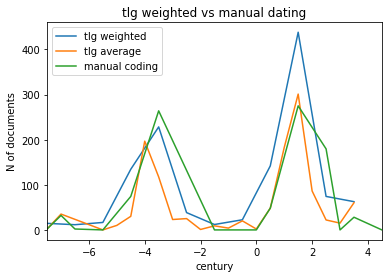

In [14]:
### documents with probabilities
ax = pd.DataFrame(centuries_documents).T[:6].plot()
AGT.groupby("date_avr").size()[:5.5].plot(ax=ax)
AGT.groupby("date_manual").size().plot(ax=ax)
plt.title("tlg weighted vs manual dating")
plt.legend(labels=["tlg weighted", "tlg average", "manual coding"])
plt.xlabel("century")
plt.ylabel("N of documents")
#plt.savefig("dating_comparison.png")
#files.download("dating_comparison.png")
#plt.show() 

# Overview of authors

In [22]:
authors = []
for author_id in AGT["author_id"].unique().tolist():
  author_df = AGT[AGT["author_id"]==author_id]
  try: author = "/".join(author_df["author"].unique().tolist())
  except: author = author_df["author"].unique().tolist()[0]
  wordcount = author_df["wordcount"].sum()
  lemmatacount = author_df["lemmata_wordcount"].sum()
  theoscount = author_df["theos_count"].sum()
  theosTF = round(theoscount / wordcount, 5)
  provenience = author_df["provenience"].unique().tolist()[0]
  date = author_df["date_avr"].unique().tolist()[0]
  author_data = [author_id, author, provenience, date, len(author_df), wordcount, lemmatacount, theoscount, theosTF]
  print(author_data)
  authors.append(author_data)

['tlg0001', 'Apollonius Rhodius', 'pagan', -2.5, 1, 38822, 12880, 62, 0.0016]
['tlg0003', 'Thucydides', 'pagan', -4.5, 1, 150160, 33162, 38, 0.00025]
['tlg0004', 'Diogenes Laertius', 'pagan', 2.5, 1, 111053, 25885, 174, 0.00157]
['tlg0005', 'Theocritus', 'pagan', -3.0, 2, 21321, 7263, 36, 0.00169]
['tlg0006', 'Euripides', 'pagan', -4.5, 13, 112900, 36539, 534, 0.00473]
['tlg0007', 'Plutarch', 'pagan', 1.0, 140, 1024630, 261081, 1595, 0.00156]
['tlg0008', 'Athenaeus', 'pagan', 2.0, 1, 266917, 64525, 402, 0.00151]
['tlg0010', 'Isocrates', 'pagan', -4.0, 30, 119302, 28379, 74, 0.00062]
['tlg0011', 'Sophocles', 'pagan', -4.5, 8, 64763, 19017, 274, 0.00423]
['tlg0012', 'Homer', 'pagan', -7.5, 3, 199840, 63299, 773, 0.00387]
['tlg0013dyon', 'Homeric hymn', 'pagan', -6.5, 1, 146, 41, 1, 0.00685]
['tlg0013deme', 'Homeric hymn', 'pagan', -6.0, 1, 3375, 1277, 28, 0.0083]
['tlg0013apol', 'Homeric hymn', 'pagan', -6.0, 1, 3902, 1320, 24, 0.00615]
['tlg0013herm', 'Homeric hymn', 'pagan', -5.0, 1, 4

In [24]:
authors_df = pd.DataFrame(authors)
authors_df.columns = ["author id", "name", "provenience", "date", "N of works", "N of words", "N of lemmata", "theos count", "theos TF"]
authors_df.head(5)

,author id,name,provenience,date,N of works,N of words,N of lemmata,theos count,theos TF
0,tlg0001,Apollonius Rhodius,pagan,-2.5,1,38822,12880,62,0.00160
1,tlg0003,Thucydides,pagan,-4.5,1,150160,33162,38,0.00025
2,tlg0004,Diogenes Laertius,pagan,2.5,1,111053,25885,174,0.00157
3,tlg0005,Theocritus,pagan,-3.0,2,21321,7263,36,0.00169
4,tlg0006,Euripides,pagan,-4.5,13,112900,36539,534,0.00473


In [25]:
len(authors_df)

199

In [0]:
set_with_dataframe(sh_inaf.add_worksheet("authors_overview", rows=1, cols=1), authors_df)

In [0]:
authors_df.to_csv("authors_overview.csv")

In [0]:
### to save the data
files.download("authors_overview.csv")

# Overview plots

In [0]:
AGT_christ = AGT[AGT["provenience"]=="christian"]
AGT_pagan = AGT[AGT["provenience"]=="pagan"]

In [32]:
plt.style.available

['classic',
 'seaborn-bright',
 'seaborn-white',
 'fivethirtyeight',
 'grayscale',
 'tableau-colorblind10',
 'seaborn-whitegrid',
 'seaborn-dark-palette',
 'seaborn-talk',
 '_classic_test',
 'seaborn-muted',
 'Solarize_Light2',
 'seaborn-paper',
 'fast',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-dark',
 'dark_background',
 'seaborn',
 'bmh',
 'seaborn-pastel',
 'seaborn-deep',
 'seaborn-poster',
 'seaborn-notebook',
 'seaborn-ticks',
 'seaborn-darkgrid']

In [67]:
### most latex documents have a textwidth of 345 pt
width_pixels = 345
inches_per_pt = 1 / 72.27
width_inches = round(width_pixels * inches_per_pt, 4)
height_inches = round(width_inches * ((5**.5 - 1) / 2), 4)
print(width_inches, height_inches)

4.7738 2.9504


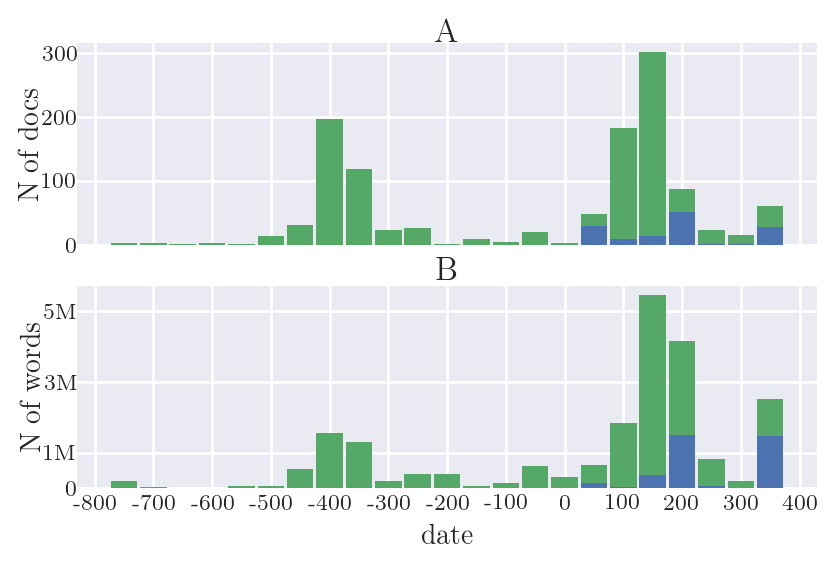

In [107]:

# Using seaborn's style
mpl.rcParams['text.usetex']=True
plt.style.use('seaborn')

nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 10,
        "font.size": 10,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 8,
        "xtick.labelsize": 8,
        "ytick.labelsize": 8,
}
mpl.rcParams.update(nice_fonts)
mpl.rcParams['xtick.major.pad']='2'
mpl.rcParams['ytick.major.pad']='0'


bins = [bin50 /100 for bin50 in range(-775, 425, 50)]
xticks = [value for value in range(-8, 5)]
xticklabels = [value for value in range(-800, 600, 100)]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(width_inches, height_inches), sharex=True, dpi = 200)
### number of words on log scale

plt.setp((ax1, ax2, ax3), xticks=xticks, xticklabels=xticklabels)

ax1.hist([AGT_christ["date_avr"], AGT_pagan["date_avr"]], bins=bins, stacked=True, rwidth=0.9)
#ax1.hlines(10, -8, 4, color="red", linewidth=0.2)
ax1.set_title("A", pad=0)
ax1.set_ylabel("N of docs", labelpad=-1)
ax1.set_yticks([0, 100, 200, 300])

ax2.hist([AGT_christ["date_avr"], AGT_pagan["date_avr"]], weights=[AGT_christ["wordcount"],AGT_pagan["wordcount"]], bins=bins, stacked=True, rwidth=0.9)
#ax2.hlines(100000, -8, 4, linestyles="dashed", color="red", linewidth=0.2)
ax2.set_title("B", pad=0)
ax2.set_ylabel("N of words", labelpad=-1)
ax2.set_xlabel("date")
ax2.set_yticks([0, 1000000, 3000000, 5000000])
ax2.set_yticklabels(["0", "1M", "3M", "5M"])

plt.subplots_adjust(hspace=0.2)
fig.savefig("temporal_overview.eps", bbox_inches='tight')

In [0]:
files.download("temporal_overview.eps")

In [34]:
### look at around 200 CE
### there seems more Christian than pagan documents
### however, the Christian texts are on average much sorter
print(AGT_pagan[AGT_pagan["date_avr"]==2]["wordcount"].mean())
print(AGT_christ[AGT_christ["date_avr"]==2]["wordcount"].mean())

73874.08333333333
29194.13725490196


# Overview by date

In [121]:
AGT_by_date = AGT.groupby("date_avr").sum().reset_index()
AGT_by_date["theosTF"] = AGT_by_date.apply(lambda row: row["theos_count"] / row["wordcount"], axis=1)
AGT_by_date["date_avr"] = AGT_by_date["date_avr"].astype(float)
AGT_by_date.drop("date_manual", inplace=True, axis=1)
AGT_by_date.set_index("date_avr", inplace=True)
AGT_by_date

,wordcount,lemmata_wordcount,theos_count,num_of_sents,theosTF
date_avr,,,,,
-7.5,199840,63299,773,14539,0.003868
-7.0,16193,6143,115,1148,0.007102
-6.5,146,41,1,13,0.006849
-6.0,9326,3356,70,652,0.007506
-5.5,44243,10352,57,3064,0.001288
-5.0,68050,26396,376,5639,0.005525
-4.5,538722,135528,1136,32277,0.002109
-4.0,1563911,381232,2141,89353,0.001369
-3.5,1298791,309119,563,69838,0.000433


In [0]:
set_with_dataframe(sh_inaf.add_worksheet("overview_by_date", rows=1, cols=1), AGT_by_date.reset_index())

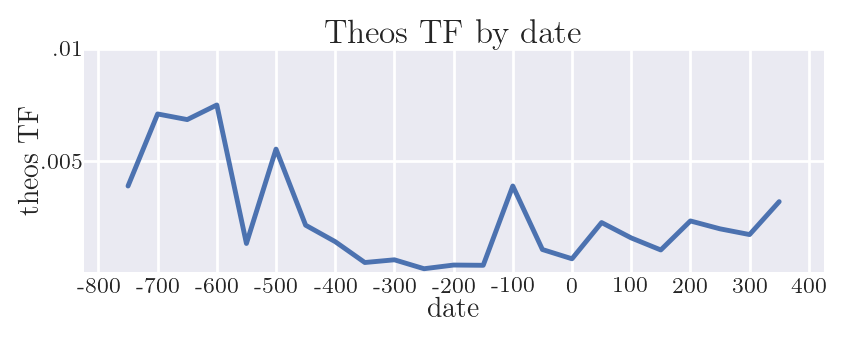

In [109]:

# Using seaborn's style
mpl.rcParams['text.usetex']=True
plt.style.use('seaborn')

nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 10,
        "font.size": 10,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 8,
        "xtick.labelsize": 8,
        "ytick.labelsize": 8,
}
mpl.rcParams.update(nice_fonts)
mpl.rcParams['xtick.major.pad']='2'
mpl.rcParams['ytick.major.pad']='0'

fig, ax = plt.subplots(1, 1, figsize=(width_inches, height_inches / 2), dpi = 200)

ax.plot(AGT_by_date["theosTF"])
ax.set_title("Theos TF by date", pad=-2)
ax.set_ylabel(r'theos TF', labelpad=-1)
ax.set_xlim(-8.25,4.25)

ax.set_ylim(0,0.01)
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_yticks([0.005, 0.01])
ax.set_xlabel("date", labelpad=0)
ax.set_yticklabels([".005", ".01"])
fig.savefig("theosTF-by-date.eps", bbox_inches='tight')

In [0]:
files.download("theosTF-by-date.eps")

In [9]:
%%time
write_file("SDAM_data/OGL/AGT.json", AGT, conf)

A file with the same name ("AGT.json") already exists in this location.
Press Enter to overwrite it or choose different path and filename: 
Your <class 'pandas.core.frame.DataFrame'> object has been succefully written as "https://sciencedata.dk/files/SDAM_root/SDAM_data/OGL/AGT.json"
CPU times: user 12.7 s, sys: 3.55 s, total: 16.3 s
Wall time: 2h 23min 58s


# Backup/Archive

In [0]:
def get_weighted_century_results(column):
  results={}
  for century in centuries:
    century_data = data_merged_dated[data_merged_dated["date_probs"][century] > 0]
    print(century_data)
    century_result = 0
    #for prob, column_value in zip(century_data[century].tolist(), century_data[column].tolist()):
    #  century_result += (column_value * prob)
    #results[century] = [century_result]
  #return pd.DataFrame(results).T

In [0]:
def get_weighted_century_results(column):
  results={}
  for century in centuries:
    century_data = data_merged_dated[data_merged_dated[century] > 0]
    century_result = 0
    for prob, column_value in zip(century_data[century].tolist(), century_data[column].tolist()):
      century_result += (column_value * prob)
    results[century] = [century_result]
  return pd.DataFrame(results).T

Text(0, 0.5, 'wordcount')

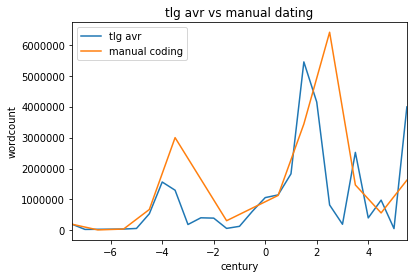

In [0]:
ax = data_merged_dated.groupby("date_avr").sum()[:5.5]["wordcount"].plot()
data_merged_dated.groupby("date_manual").sum()["wordcount"].plot(ax=ax)
plt.title("tlg avr vs manual dating")
plt.legend(labels=["tlg avr", "manual coding"])
plt.xlabel("century")
plt.ylabel("wordcount")
#plt.savefig("wordcount_comparison.png")
#files.download("wordcount_comparison.png")
#plt.show() 